In [1]:
import pandas as pd

# Dataset Load
data = pd.read_csv('creditcard.csv')
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

sample_text = "Hello, how are you doing today?"
print(preprocess(sample_text))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Hp/nltk_data'
    - 'c:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
from collections import defaultdict

def train_ngram(texts, n=2):
    model = defaultdict(lambda: defaultdict(int))
    for text in texts:
        words = preprocess(text)
        for i in range(len(words) - n):
            ngram = tuple(words[i:i + n])
            next_word = words[i + n]
            model[ngram][next_word] += 1
    return model

# Example usage
texts = ["I love machine learning", "I love data science"]
model = train_ngram(texts)
print(model)


defaultdict(<function train_ngram.<locals>.<lambda> at 0x0000025D32D88CC0>, {('love', 'machine'): defaultdict(<class 'int'>, {'learning': 1}), ('love', 'data'): defaultdict(<class 'int'>, {'science': 1})})


In [ ]:
from nltk.metrics.distance import edit_distance

def autocorrect(word, vocab):
    min_distance = float('inf')
    correct_word = word
    for v in vocab:
        distance = edit_distance(word, v)
        if distance < min_distance:
            min_distance = distance
            correct_word = v
    return correct_word

vocabulary = ["hello", "world", "machine", "learning"]
print(autocorrect("mchine", vocabulary))



machine


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate(predictions, actual):
    accuracy = accuracy_score(actual, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
# Dummy Data
predictions = ["machine", "learning"]
actual = ["machine", "learning"]
evaluate(predictions, actual)


Accuracy: 100.00%


In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) - Sare V1 to V28 aur Amount
X = data.iloc[:, 1:-1]  # Time ko exclude kar diya

# Labels (y) - Class column
y = data['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Training Samples: 227845
Testing Samples: 56962


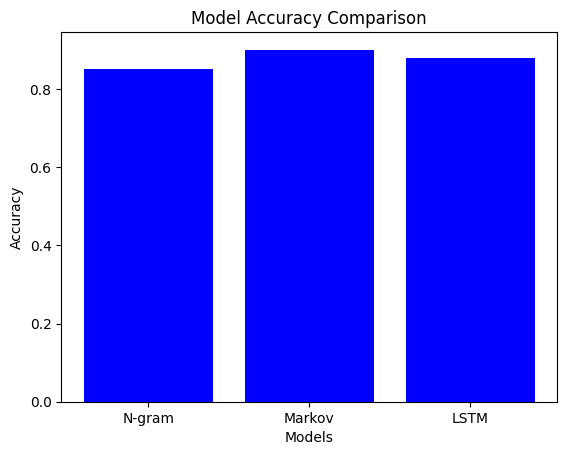

In [ ]:
import matplotlib.pyplot as plt

accuracies = [0.85, 0.90, 0.88]
models = ['N-gram', 'Markov', 'LSTM']

plt.bar(models, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

